In [154]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt

In [155]:
results_df = pd.read_excel("Clean Test Results.xlsx")
responses_df = pd.read_excel("Student Responses.xlsx")
answers_df = pd.read_excel("Test Answers.xlsx")

In [156]:
results_df.head()

,Pilot Class Math 9,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Scores
0,Student 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Student 2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,20.0
2,Student 3,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0
3,Student 4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
4,Student 5,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,18.0


In [157]:
responses_df.head()

,Score,1) Terms with the same variables raised to the same exponent are called______.,2) A ________ is a letter or symbol representing an unknown value.,3) The inverse operation needed to solve the equation 3x - 6 = 18 is,a) 3,5. A system of equations that has no solution.,"6) When you graph an inequality, you use a closed dot when you use which symbols?",7. Translate this phrase into an algebraic expression.\n2 times the difference of t and 11.,8. Which verbal expression best represents the algebraic expression “5a – 7”?,"9) What word phrase can you use to represent ""5x + 2""?",...,16.Find the y-value using substitution.\nx + 2y = 2 \nx = -4y + 2,"d) (7,0)",18. 4x + 8y = 20 \n -4x + 2y = -30 \nWhich variable will be eliminated?,19. What would be the first step in finding the solution with elimination? \n4x + 3y = 1 \nx - 3y = -11,20. How many solutions does the following equation have? \n3x − 3 = −3 + 3x,21.What inequality does the number line graph represent?\n,22. Solve the following inequality: \n−3x−5 ≤ 22,23. solve for n. \n21= 3+ 4n+ 5n.,24) What is the first step to solve this equation: \n 11 - 3x = 44,25. What will the equation look like after you combine like terms?\n-2x + 5-3x = 35
0,21,d) Like terms,a) variable,b) addition,a) 3,d) Inconsistent system,"a) ≤, ≥",b) 2(t - 11),c) Seven less than the product of five and a n...,d) the sum of five times a number x and two,...,c) y = 0,"d) (7,0)",a) The x,a. cross out the 3y and -3y,a) One Solution,d) x ≤ -3,a) x≤−9,d) n= 2,b) Subtract 11 from both sides.,a) -5x + 5 = 35
1,9,b) Unlike terms,a) variable,a) subtraction,c) 18,d) Inconsistent system,"b) <, >",b) 2(t - 11),a) Five less than the sum of a number and seven.,b) two times the sum of a number x and five,...,b) y = 2,"c) (6,0)",a) The x,b. cross out the 4x and x,c) No Solutions,a) x > 3,a) x≤−9,a) n=9,b) Subtract 11 from both sides.,c) x + 5 = 35
2,8,d) Like terms,a) variable,c) multiplication,a) 3,d) Inconsistent system,"a) ≤, ≥",a) 2t – 11,d) Five times seven subtracted from a number.,b) two times the sum of a number x and five,...,b) y = 2,"c) (6,0)",a) The x,d. add 1 and -11,c) No Solutions,a) x > 3,c) x≥3,d) n= 2,a) Add 3 to both sides.,c) x + 5 = 35
3,20,d) Like terms,a) variable,b) addition,a) 3,d) Inconsistent system,"a) ≤, ≥",b) 2(t - 11),c) Seven less than the product of five and a n...,d) the sum of five times a number x and two,...,c) y = 0,"d) (7,0)",a) The x,a. cross out the 3y and -3y,c) No Solutions,c) x ≥ 3,b) x≥−9,d) n= 2,c) Add 11 to both sides.,b) 5x + 5 = 35
4,25,d) Like terms,a) variable,b) addition,a) 3,d) Inconsistent system,"a) ≤, ≥",b) 2(t - 11),c) Seven less than the product of five and a n...,d) the sum of five times a number x and two,...,c) y = 0,"d) (7,0)",a) The x,a. cross out the 3y and -3y,b) Infinitely Many Solutions,c) x ≥ 3,b) x≥−9,d) n= 2,b) Subtract 11 from both sides.,a) -5x + 5 = 35


In [158]:
answers_df.head()

,Correct Answers
0,1. d
1,2. a
2,3. b
3,4. a
4,5. d


In [159]:
validity_df = pd.DataFrame()

results_df.drop(index=0,inplace=True)
results_df.reset_index(drop=True,inplace=True)

question_cols = results_df.columns[1:len(results_df.columns)-1]
validity_df['Question'] = pd.Series(question_cols)
item_difficulty_index = [results_df[col].sum() / len(results_df) for col in question_cols]
validity_df['item_difficulty_index'] = pd.Series(item_difficulty_index)

validity_df.head()

,Question,item_difficulty_index
0,Q1,0.750000
1,Q2,0.666667
2,Q3,0.666667
3,Q4,0.916667
4,Q5,0.791667


In [160]:
results_df['scores_percent'] = results_df['Scores'] / (len(results_df.columns) -2)

point_biserial_corr = [stats.pointbiserialr(results_df[col],results_df['scores_percent'])[0] for col in question_cols]
point_biserial_pvalues = [stats.pointbiserialr(results_df[col],results_df['scores_percent'])[1] for col in question_cols]

validity_df['point_biserial_corr'] = pd.Series(point_biserial_corr)
validity_df['point_biserial_pvalues'] = pd.Series(point_biserial_pvalues)

validity_df.head()

,Question,item_difficulty_index,point_biserial_corr,point_biserial_pvalues
0,Q1,0.750000,-0.008673,0.967915
1,Q2,0.666667,0.191208,0.370778
2,Q3,0.666667,0.541757,0.006250
3,Q4,0.916667,0.122297,0.569158
4,Q5,0.791667,0.161837,0.449942


In [161]:
#changed question_cols into a list of the questions as they are represented in the response_df
question_cols = responses_df.columns[1:len(responses_df)]
for question in question_cols:
    responses_df[question] = responses_df[question].apply(lambda x: x[0])

answers = ['a','b','c','d']

for answer in answers:
    validity_df[answer] = pd.Series([len(responses_df[responses_df[question] == answer]) / len(responses_df) for question in question_cols])

validity_df.head()

,Question,item_difficulty_index,point_biserial_corr,point_biserial_pvalues,a,b,c,d
0,Q1,0.750000,-0.008673,0.967915,0.041667,0.208333,0.041667,0.708333
1,Q2,0.666667,0.191208,0.370778,0.666667,0.166667,0.083333,0.083333
2,Q3,0.666667,0.541757,0.006250,0.208333,0.500000,0.291667,0.000000
3,Q4,0.916667,0.122297,0.569158,0.708333,0.208333,0.041667,0.041667
4,Q5,0.791667,0.161837,0.449942,0.000000,0.041667,0.083333,0.875000


In [162]:
validity_df

,Question,item_difficulty_index,point_biserial_corr,point_biserial_pvalues,a,b,c,d
0,Q1,0.750000,-0.008673,0.967915,0.041667,0.208333,0.041667,0.708333
1,Q2,0.666667,0.191208,0.370778,0.666667,0.166667,0.083333,0.083333
2,Q3,0.666667,0.541757,0.006250,0.208333,0.500000,0.291667,0.000000
3,Q4,0.916667,0.122297,0.569158,0.708333,0.208333,0.041667,0.041667
4,Q5,0.791667,0.161837,0.449942,0.000000,0.041667,0.083333,0.875000
5,Q6,0.916667,0.529955,0.007731,0.791667,0.166667,0.000000,0.041667
6,Q7,0.583333,0.007981,0.970476,0.083333,0.833333,0.000000,0.083333
7,Q8,0.500000,0.706069,0.000116,0.166667,0.125000,0.500000,0.208333
8,Q9,0.541667,0.636926,0.000817,0.083333,0.291667,0.083333,0.541667
9,Q10,0.833333,0.483723,0.016626,0.833333,0.041667,0.041667,0.083333


Text(0, 0.5, 'Item Difficulty Index')

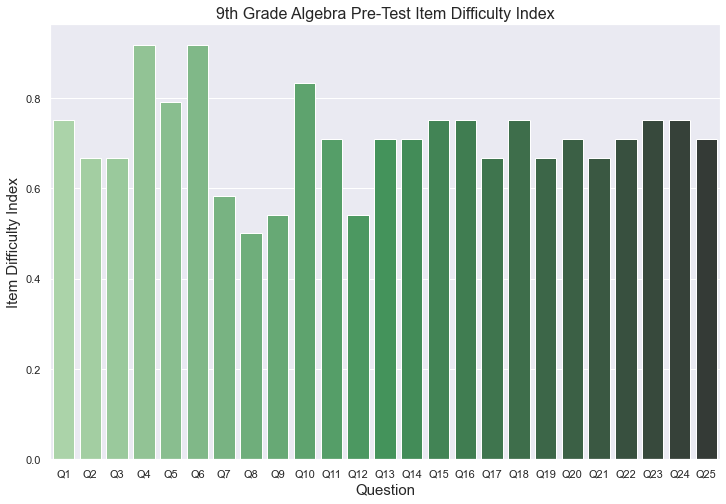

In [163]:
sns.set_style('darkgrid')

plt.figure(figsize=(12,8))
plt.title('9th Grade Algebra Pre-Test Item Difficulty Index',size=16)
sns.barplot(data=validity_df,x='Question',y='item_difficulty_index',palette='Greens_d')
plt.xlabel('Question',size=15)
plt.ylabel('Item Difficulty Index',size=15)

Text(0, 0.5, 'Percent Score')

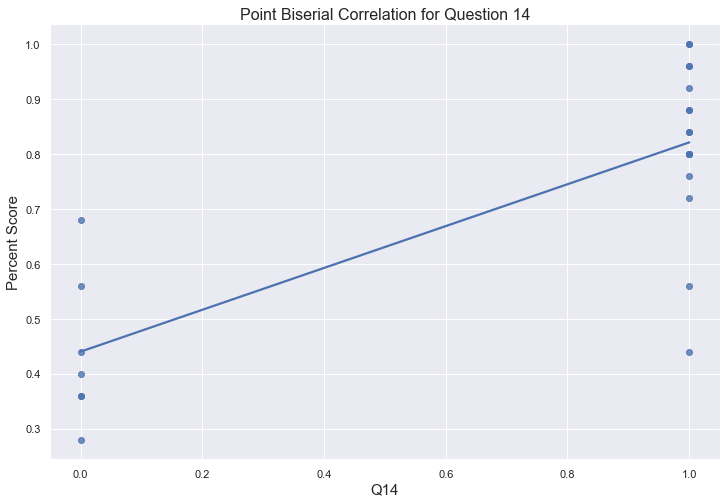

In [164]:
sns.set_style('darkgrid')

plt.figure(figsize=(12,8))
plt.title('Point Biserial Correlation for Question 14',size=16)
sns.regplot(data=results_df,x='Q14',y='scores_percent',ci=False)
plt.xlabel('Q14',size=15)
plt.ylabel('Percent Score',size=15)

Text(0, 0.5, 'Point Biserial Correlation')

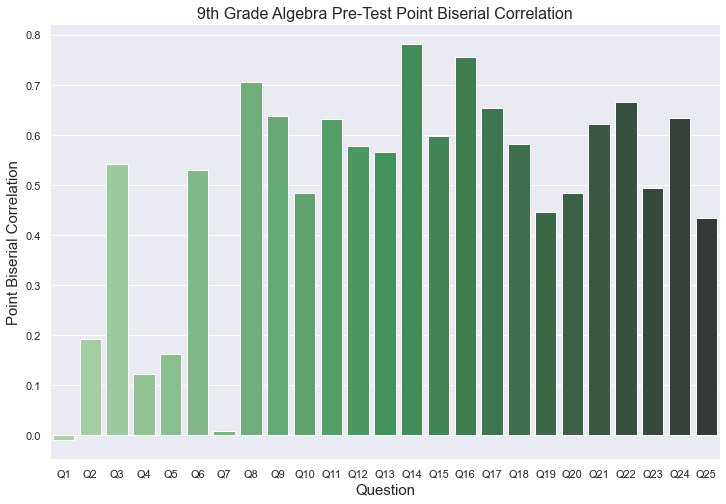

In [165]:
sns.set_style('darkgrid')

plt.figure(figsize=(12,8))
plt.title('9th Grade Algebra Pre-Test Point Biserial Correlation',size=16)
sns.barplot(data=validity_df,x='Question',y='point_biserial_corr',palette='Greens_d')
plt.xlabel('Question',size=15)
plt.ylabel('Point Biserial Correlation',size=15)

Text(0, 0.5, 'Percent of Students Who Selected that Answer ')

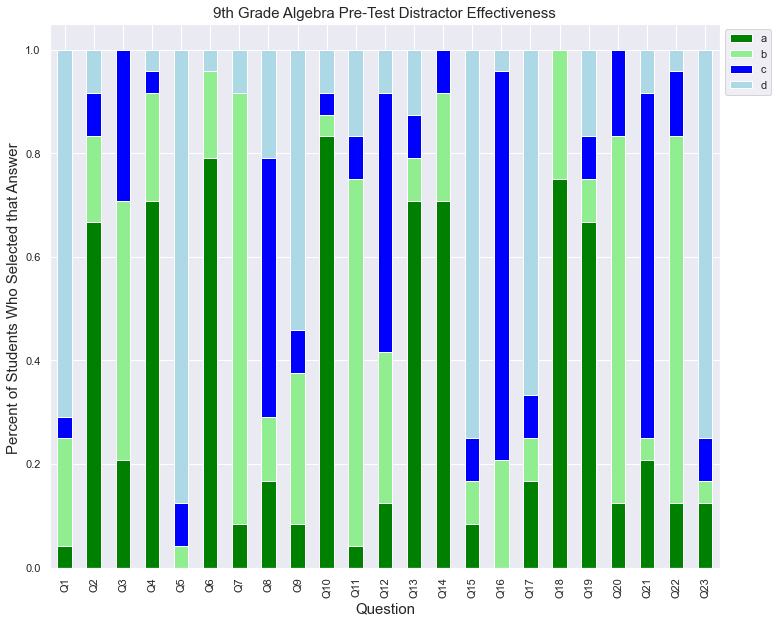

In [166]:
validity_df.set_index('Question',inplace=True)

sns.set_theme(rc={'figure.figsize':(12,10)})
validity_df.dropna(subset=['a','b','c','d'],inplace=True)
plot = validity_df[['a','b','c','d']].plot(kind='bar',stacked=True,color=['green','lightgreen','blue','lightblue'])
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.title('9th Grade Algebra Pre-Test Distractor Effectiveness',size=15)
plt.xlabel('Question',size=15)
plt.ylabel('Percent of Students Who Selected that Answer ',size=15)